Pearson correlation coefficient between total_rooms and median_house_value: 0.13
Linear Regression: MSE = 4906899967.84, R2 = 0.63
SVM: MSE = 13669587305.38, R2 = -0.04
Random Forest: MSE = 2401456330.75, R2 = 0.82
Decision Tree: MSE = 4869924946.80, R2 = 0.63
Gradient Boosting: MSE = 3122240990.01, R2 = 0.76
Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - loss: 55460769792.0000 - val_loss: 53233524736.0000
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - loss: 51053682688.0000 - val_loss: 41030868992.0000
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - loss: 37190549504.0000 - val_loss: 22937001984.0000
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 19453876224.0000 - val_loss: 11428864000.0000
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - loss: 10496548864.0000 - val_loss: 8195466240.0000
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step - loss: 7815193600.0000 - val_loss: 7167235072.0000
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 6744902656.0000 - val_loss: 6547702272.0000
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 527us/step - loss: 6260249088.0000 - val_loss: 6096550400.0000
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 5759107584.0000 - val_loss: 5750018560.0000
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 533u

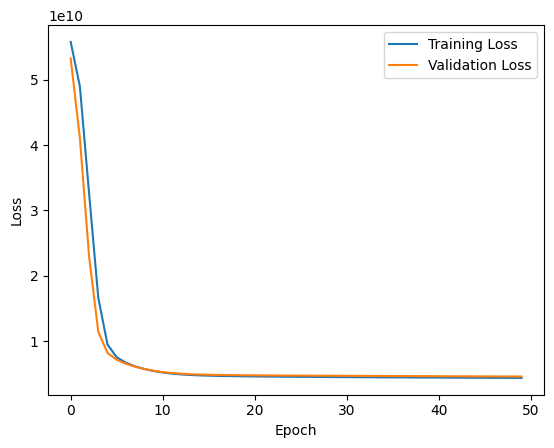

Epoch 1/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 45775200256.0000 - val_loss: 13186942976.0000
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12975110144.0000 - val_loss: 12307300352.0000
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12091476992.0000 - val_loss: 11658018816.0000
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11782212608.0000 - val_loss: 10643709952.0000
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 10300487680.0000 - val_loss: 7992434688.0000
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7362842112.0000 - val_loss: 6366201344.0000
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6016643072.0000 - val_loss: 5966223360.0000
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5684629504.0000 - val_loss: 5718389248.0000
Epoch 9/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5555702272.0000 - val_loss: 5543792640.0000
Epoch 10/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 55153

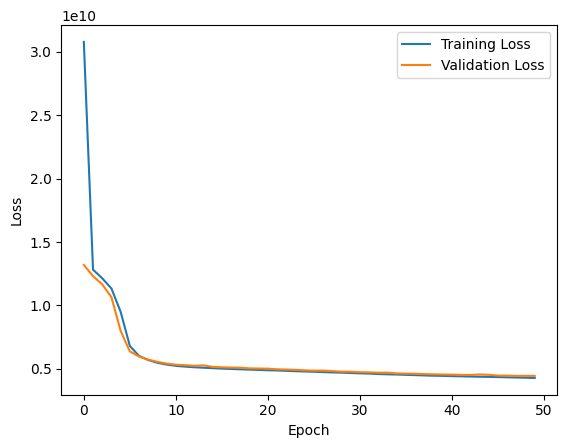

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import tensorflow as tf
from tensorflow.keras import layers, models


#loading the dataset and preprocessing
df = pd.read_csv('housing.csv') 
df = df.dropna(subset=['median_house_value'])
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

#data is separated into numerical and categorical features 
#one hot encoding is performed on categorical features
#Imputtion ans scaling is performed on numerical for presprocessing
categorical_features = ['ocean_proximity']
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_preprocessed = preprocessor.fit_transform(X)

#a correlation between total rooms and median house value is calculated using pearson correlation
#a positive value of 0.13 is displayed which shows there is a relation
corr, _ = pearsonr(df['total_rooms'], df['median_house_value'])
print(f'Pearson correlation coefficient between total_rooms and median_house_value: {corr:.2f}')


X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

#a dictionary of models is created and for each model MSE and r2 is calculated to check efficiency of prediction
#(results given below)
models_dict = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
for name, model in models_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: MSE = {mse:.2f}, R2 = {r2:.2f}')



#a sequential neural ntwork of 64 layers is created 
#evaluation is based on MSE Aand r2
#train and validation loss is plotted for visualisation
ann_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

ann_model.compile(optimizer='adam', loss='mean_squared_error')

history_ann = ann_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

y_pred_ann = ann_model.predict(X_test)
mse_ann = mean_squared_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)
print(f'ANN: MSE = {mse_ann:.2f}, R2 = {r2_ann:.2f}')

plt.plot(history_ann.history['loss'], label='Training Loss')
plt.plot(history_ann.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



#1D convolutional model created
#( steps same as above)
cnn_ann_model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

cnn_ann_model.compile(optimizer='adam', loss='mean_squared_error')

history_cnn_ann = cnn_ann_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

y_pred_cnn_ann = cnn_ann_model.predict(X_test)
mse_cnn_ann = mean_squared_error(y_test, y_pred_cnn_ann)
r2_cnn_ann = r2_score(y_test, y_pred_cnn_ann)
print(f'CNN + ANN: MSE = {mse_cnn_ann:.2f}, R2 = {r2_cnn_ann:.2f}')

plt.plot(history_cnn_ann.history['loss'], label='Training Loss')
plt.plot(history_cnn_ann.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
